Importando Bibliotecas

In [1]:
#pip install pandas
import pandas as pd
#pip install numpy
import numpy as np
#pip install pandas-datareader
import pandas_datareader.data as web
#pip install seaborn
import seaborn as sns
# pip install statistics
import statistics  as sts

#pip install yfinance
import yfinance as yf
yf.pdr_override()

Definindo função para tratamento de dados

In [2]:
def tratar_dados(df: pd.DataFrame) -> None:
    """
    Esta função realiza o pré-processamento dos dados no DataFrame fornecido.

    Args:
        df (pd.DataFrame): O DataFrame a ser processado.

    Returns:
        None
    """
    # Remove duplicatas do DataFrame
    df.drop_duplicates(inplace=True)
    
    # Preenche valores ausentes em cada coluna com a mediana
    for coluna in df.columns:
        df[coluna] = df[coluna].fillna(df[coluna].median())

Obtendo dados

In [3]:
# tickers = ["GOOG", 
#            "AAPL", 
#            "MSFT", 
#            "AMZN"]

tickers = ["VALE3.SA", 
           "ITSA4.SA",  
           "WEGE3.SA",
           "PETR4.SA",
           "BBAS3.SA"]

In [4]:
carteria = web.get_data_yahoo(tickers, period="5y")["Adj Close"]
carteria

[*********************100%%**********************]  5 of 5 completed


,BBAS3.SA,ITSA4.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2018-09-06,21.172426,6.489491,6.763696,36.842514,9.085624
2018-09-10,20.883675,6.482803,6.859862,36.663403,9.113595
2018-09-11,19.938028,6.215196,6.589172,36.229393,8.903815
2018-09-12,20.028898,6.255336,6.749451,36.821850,8.763970
2018-09-13,19.760983,6.295478,6.663969,37.049191,8.735992
...,...,...,...,...,...
2023-08-31,47.099998,9.240000,31.940001,65.080002,35.880001
2023-09-01,47.419998,9.340000,32.630001,68.889999,35.950001
2023-09-04,47.270000,9.240000,32.290001,69.400002,36.130001


In [6]:
carteria["BBAS3.SA"].iloc[0]

21.172426223754883

In [6]:
ibov = web.get_data_yahoo("^BVSP", period="5y")["Adj Close"]
ibov = pd.DataFrame(ibov)
ibov

[*********************100%%**********************]  1 of 1 completed


,Adj Close
Date,
2018-09-06,76416.0
2018-09-10,76436.0
2018-09-11,74657.0
2018-09-12,75125.0
2018-09-13,74687.0
...,...
2023-08-31,115742.0
2023-09-01,117893.0
2023-09-04,117777.0


Limpando, tratando e normalizando dados

In [7]:
tratar_dados(carteria)
tratar_dados(ibov)

Normalizando dados

In [8]:
carteria_normalizada = (carteria / carteria.iloc[0])*(100/(carteria.columns.size))
carteria_normalizada

,BBAS3.SA,ITSA4.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2018-09-06,20.000000,20.000000,20.000000,20.000000,20.000000
2018-09-10,19.727245,19.979383,20.284360,19.902769,20.061573
2018-09-11,18.833964,19.154641,19.483938,19.667162,19.599793
2018-09-12,18.919800,19.278355,19.957870,19.988784,19.291951
2018-09-13,18.666713,19.402061,19.705102,20.112192,19.230374
...,...,...,...,...,...
2023-08-31,44.491833,28.476799,94.445389,35.328752,78.981930
2023-09-01,44.794113,28.784990,96.485695,37.397013,79.136019
2023-09-04,44.652421,28.476799,95.480327,37.673869,79.532250


Gerando saldo da carteira

In [10]:
carteria_normalizada["saldo"] =  carteria_normalizada.sum(axis=1)
carteria_normalizada

,BBAS3.SA,ITSA4.SA,PETR4.SA,VALE3.SA,WEGE3.SA,saldo
Date,,,,,,
2018-09-06,20.000000,20.000000,20.000000,20.000000,20.000000,100.000000
2018-09-10,19.727245,19.979383,20.284360,19.902769,20.061573,99.955330
2018-09-11,18.833964,19.154641,19.483938,19.667162,19.599793,96.739498
2018-09-12,18.919800,19.278355,19.957870,19.988784,19.291951,97.436760
2018-09-13,18.666713,19.402061,19.705102,20.112192,19.230374,97.116443
...,...,...,...,...,...,...
2023-08-31,44.491833,28.476799,94.445389,35.328752,78.981930,281.724703
2023-09-01,44.794113,28.784990,96.485695,37.397013,79.136019,286.597830
2023-09-04,44.652421,28.476799,95.480327,37.673869,79.532250,285.815666


In [22]:
ibov_normalizado = (ibov / ibov.iloc[0])*100
ibov_normalizado

,Adj Close
Date,
2018-09-06,100.000000
2018-09-10,100.026173
2018-09-11,97.698126
2018-09-12,98.310563
2018-09-13,97.737385
...,...
2023-08-31,151.463044
2023-09-01,154.277900
2023-09-04,154.126099


Movendo as datas dos indicices para uma coluna

In [11]:
carteria_normalizada.reset_index(inplace=True)
carteria_normalizada

,Date,BBAS3.SA,ITSA4.SA,PETR4.SA,VALE3.SA,WEGE3.SA,saldo
0,2018-09-06,20.000000,20.000000,20.000000,20.000000,20.000000,100.000000
1,2018-09-10,19.727245,19.979383,20.284360,19.902769,20.061573,99.955330
2,2018-09-11,18.833964,19.154641,19.483938,19.667162,19.599793,96.739498
3,2018-09-12,18.919800,19.278355,19.957870,19.988784,19.291951,97.436760
4,2018-09-13,18.666713,19.402061,19.705102,20.112192,19.230374,97.116443
...,...,...,...,...,...,...,...
1235,2023-08-31,44.491833,28.476799,94.445389,35.328752,78.981930,281.724703
1236,2023-09-01,44.794113,28.784990,96.485695,37.397013,79.136019,286.597830
1237,2023-09-04,44.652421,28.476799,95.480327,37.673869,79.532250,285.815666
1238,2023-09-05,44.491833,28.106970,98.673841,37.511012,79.047966,287.831622


In [12]:
ibov_normalizado.reset_index(inplace=True)
ibov_normalizado

,Date,Adj Close
0,2018-09-06,100.000000
1,2018-09-10,100.026173
2,2018-09-11,97.698126
3,2018-09-12,98.310563
4,2018-09-13,97.737385
...,...,...
1214,2023-08-31,151.463044
1215,2023-09-01,154.277900
1216,2023-09-04,154.126099
1217,2023-09-05,153.542452


<Axes: >

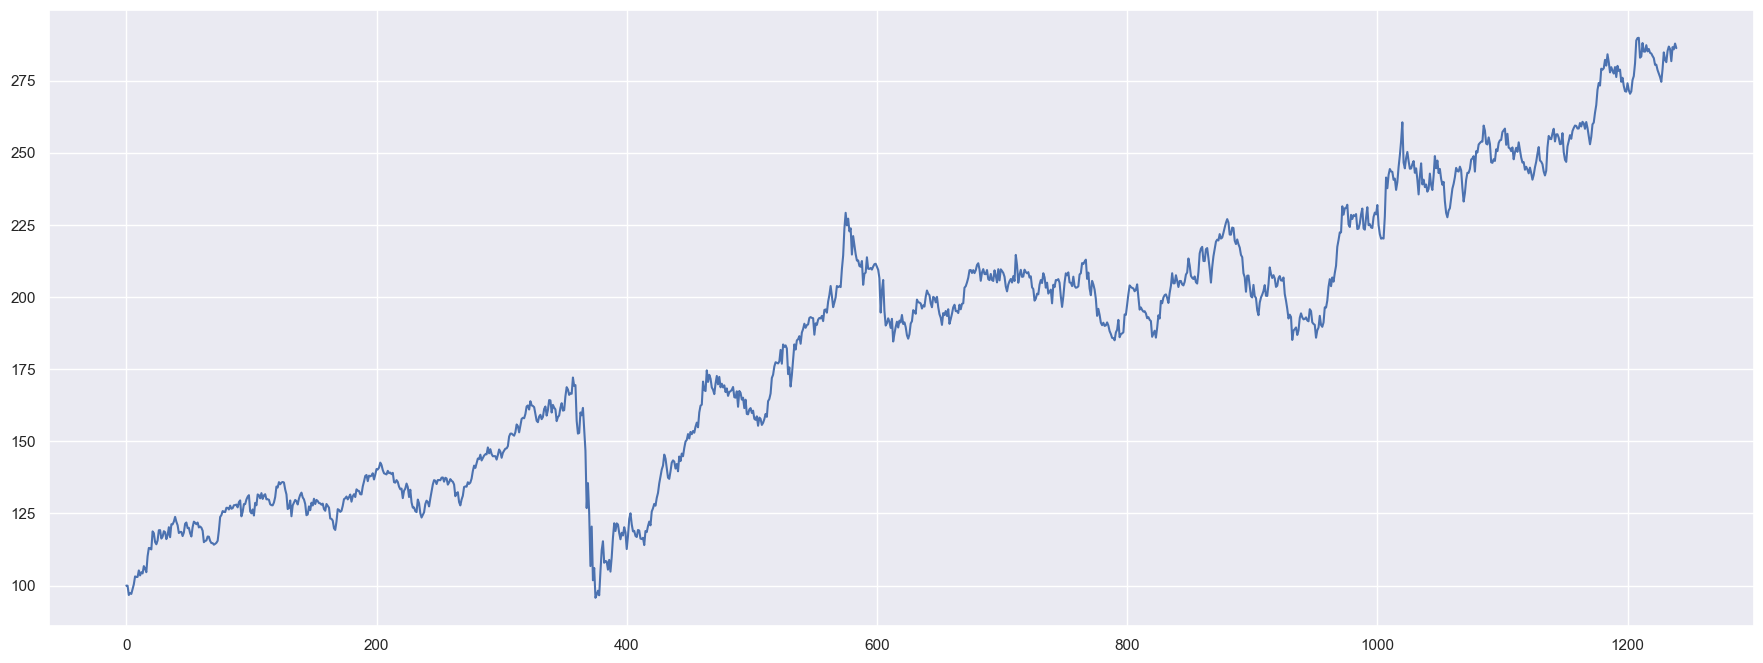

In [15]:
sns.set()
carteria_normalizada["saldo"].plot(figsize=(22,8),
                                   label="Carteria")


<Axes: >

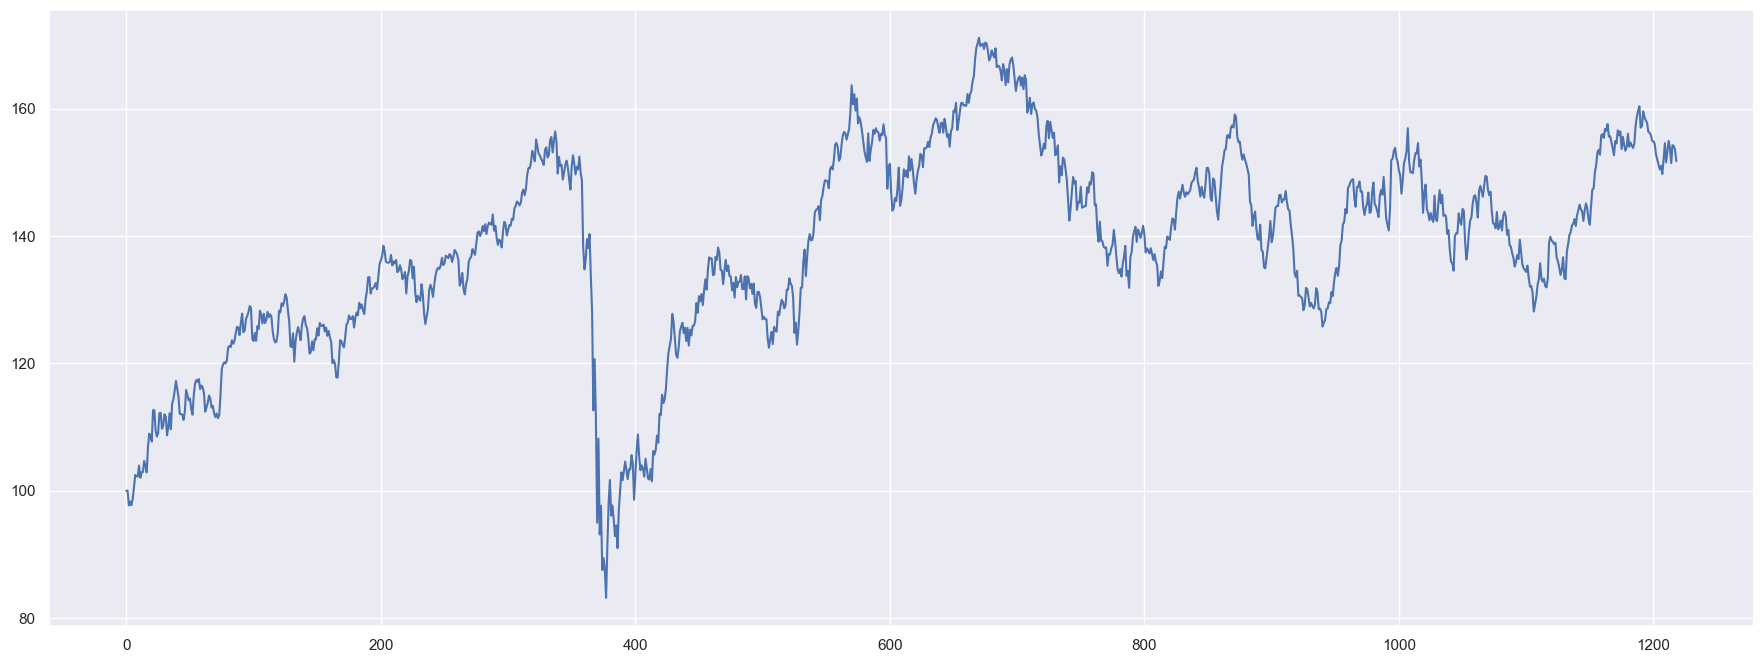

In [17]:
ibov_normalizado["Adj Close"].plot(figsize=(22,8), label="IBOV")